In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Activation,Dense
from tensorflow.keras import optimizers
from tensorflow.keras import initializers
from tensorflow.keras import datasets
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras.layers import Dropout
from tensorflow.math import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [2]:
(X_train, Y_train), (x_test, y_test) = datasets.fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


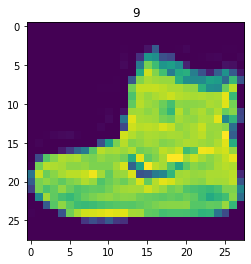

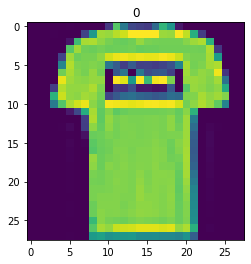

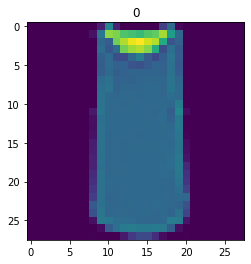

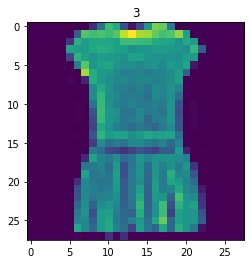

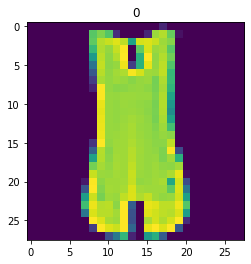

In [3]:
for i in range(5):
    plt.figure()
    plt.imshow(X_train[i])
    plt.title(Y_train[i])

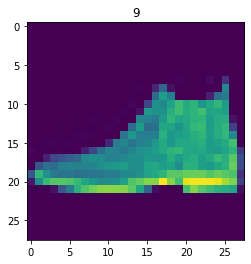

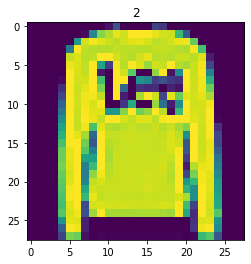

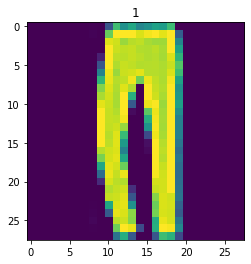

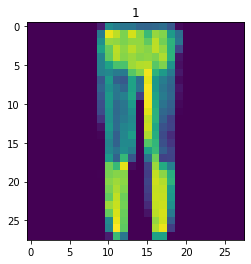

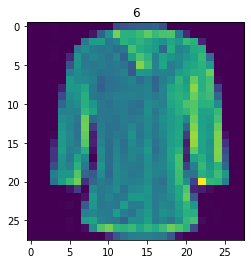

In [4]:
for i in range(5):
    plt.figure()
    plt.imshow(x_test[i])
    plt.title(y_test[i])

In [5]:
X_train.shape,x_test.shape,Y_train.shape,y_test.shape

((60000, 28, 28), (10000, 28, 28), (60000,), (10000,))

Reshapinf

In [6]:
X_train = np.array(X_train)
X_train = X_train.reshape((60000,28*28))
X_train = X_train/255
x_test = np.array(x_test)
x_test = x_test.reshape((10000,28*28))
x_test = x_test/255

In [7]:
model = Sequential()
model.add(Dense(150,input_shape = (28*28,)))
model.add(Activation('sigmoid'))
model.add(Dense(100))
model.add(Activation('sigmoid'))
model.add(Dense(75))
model.add(Activation('sigmoid'))
model.add(Dense(50))
model.add(Activation('sigmoid'))
model.add(Dense(25))
model.add(Activation('sigmoid'))
model.add(Dense(10))
model.add(Activation('sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 150)               117750    
                                                                 
 activation (Activation)     (None, 150)               0         
                                                                 
 dense_1 (Dense)             (None, 100)               15100     
                                                                 
 activation_1 (Activation)   (None, 100)               0         
                                                                 
 dense_2 (Dense)             (None, 75)                7575      
                                                                 
 activation_2 (Activation)   (None, 75)                0         
                                                                 
 dense_3 (Dense)             (None, 50)                3

In [9]:
opt = optimizers.SGD()
model.compile(optimizer = opt,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
mkl = model.fit(x = X_train,y = Y_train,batch_size = 50,epochs = 5,verbose = 1,validation_split = 0.2)

Epoch 1/5
960/960 [==============================] - 7s 7ms/step - loss: 2.3027 - accuracy: 0.1028 - val_loss: 2.3025 - val_accuracy: 0.1005
Epoch 2/5
960/960 [==============================] - 5s 5ms/step - loss: 2.3026 - accuracy: 0.1029 - val_loss: 2.3029 - val_accuracy: 0.0957
Epoch 3/5
960/960 [==============================] - 4s 4ms/step - loss: 2.3026 - accuracy: 0.1035 - val_loss: 2.3026 - val_accuracy: 0.0983
Epoch 4/5
960/960 [==============================] - 3s 3ms/step - loss: 2.3025 - accuracy: 0.1018 - val_loss: 2.3024 - val_accuracy: 0.0983
Epoch 5/5
960/960 [==============================] - 3s 3ms/step - loss: 2.3024 - accuracy: 0.1042 - val_loss: 2.3025 - val_accuracy: 0.1003


Text(0.5, 0, 'epoch')

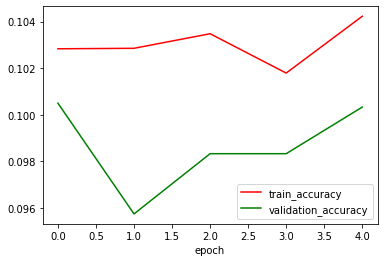

In [10]:
plt.plot(mkl.history['accuracy'],color = 'r',label = 'train_accuracy')
plt.plot(mkl.history['val_accuracy'],color = 'g',label = 'validation_accuracy')
plt.legend()
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

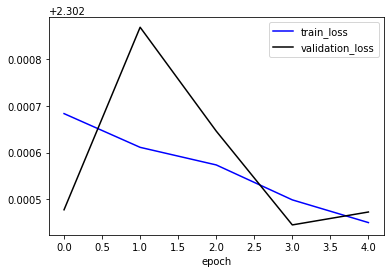

In [11]:
plt.plot(mkl.history['loss'],color = 'b',label = 'train_loss')
plt.plot(mkl.history['val_loss'],color = 'black',label = 'validation_loss')
plt.legend()
plt.xlabel('epoch')

In [12]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 2s 5ms/step - loss: 2.3022 - accuracy: 0.1000


[2.3022122383117676, 0.10000000149011612]

The model shows that accuracy of validation is more than training so it is overfitting model

In [14]:
confusion_matrix(y_test,np.argmax(model.predict(x_test),axis = 1))

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000],
       [   0,    0,    0,    0,    0,    0,    0,    0,    0, 1000]],
      dtype=int32)>

In [19]:
pred1 = np.argmax(model.predict(x_test),axis = 1)

In [24]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,pred1)

0.1

In [27]:
from sklearn.metrics import confusion_matrix, accuracy_score,precision_score,recall_score,f1_score
precision_score(y_test,pred1,average='macro')

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


0.01

In [28]:
recall_score(y_test,pred1,average='micro')

0.1

In [29]:
f1_score(y_test,pred1,average='micro')

0.10000000000000002

In [16]:
from keras.layers import BatchNormalization

In [30]:
model2=Sequential()

In [31]:
model2 = Sequential()
model2.add(Dense(150,input_shape = (28*28,),kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dense(100,kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(75,kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(50,kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(25,kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('relu'))
model2.add(Dropout(0.2))
model2.add(Dense(10,kernel_initializer = initializers.HeNormal))
model2.add(BatchNormalization())
model2.add(Activation('softmax'))
model2.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_18 (Dense)            (None, 150)               117750    
                                                                 
 batch_normalization_5 (Batc  (None, 150)              600       
 hNormalization)                                                 
                                                                 
 activation_18 (Activation)  (None, 150)               0         
                                                                 
 dense_19 (Dense)            (None, 100)               15100     
                                                                 
 batch_normalization_6 (Batc  (None, 100)              400       
 hNormalization)                                                 
                                                                 
 activation_19 (Activation)  (None, 100)              

In [32]:
opt = optimizers.Adam()
model2.compile(optimizer = opt,loss = 'sparse_categorical_crossentropy',metrics = ['accuracy'])
mkl2 = model2.fit(x = X_train,y = Y_train,batch_size = 50,epochs = 5,verbose = 1,validation_split = 0.2)

Epoch 1/5
960/960 [==============================] - 8s 6ms/step - loss: 0.9952 - accuracy: 0.7181 - val_loss: 0.5258 - val_accuracy: 0.8403
Epoch 2/5
960/960 [==============================] - 6s 6ms/step - loss: 0.6519 - accuracy: 0.8172 - val_loss: 0.4397 - val_accuracy: 0.8602
Epoch 3/5
960/960 [==============================] - 5s 6ms/step - loss: 0.5635 - accuracy: 0.8366 - val_loss: 0.4410 - val_accuracy: 0.8526
Epoch 4/5
960/960 [==============================] - 6s 6ms/step - loss: 0.5172 - accuracy: 0.8485 - val_loss: 0.3911 - val_accuracy: 0.8687
Epoch 5/5
960/960 [==============================] - 6s 6ms/step - loss: 0.4826 - accuracy: 0.8573 - val_loss: 0.3782 - val_accuracy: 0.8742


Text(0.5, 0, 'epoch')

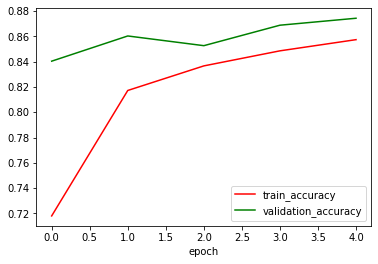

In [33]:
plt.plot(mkl2.history['accuracy'],color = 'r',label = 'train_accuracy')
plt.plot(mkl2.history['val_accuracy'],color = 'g',label = 'validation_accuracy')
plt.legend()
plt.xlabel('epoch')

Text(0.5, 0, 'epoch')

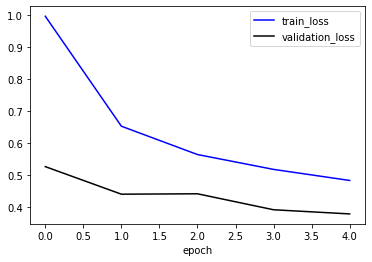

In [34]:
plt.plot(mkl2.history['loss'],color = 'b',label = 'train_loss')
plt.plot(mkl2.history['val_loss'],color = 'black',label = 'validation_loss')
plt.legend()
plt.xlabel('epoch')

In [35]:
model2.evaluate(x_test,y_test)

313/313 [==============================] - 2s 4ms/step - loss: 0.4078 - accuracy: 0.8630


[0.40778282284736633, 0.8629999756813049]

In [36]:
confusion_matrix(y_test,np.argmax(model2.predict(x_test),axis = 1))

array([[834,   8,  27,  47,   6,   2,  65,   2,   8,   1],
       [  2, 969,   2,  23,   2,   0,   0,   0,   2,   0],
       [ 13,   1, 866,  10,  88,   1,  18,   1,   2,   0],
       [ 10,  23,  16, 878,  47,   0,  23,   0,   3,   0],
       [  0,   5, 145,  20, 797,   0,  32,   0,   1,   0],
       [  0,   0,   0,   1,   0, 921,   0,  50,   1,  27],
       [138,   8, 170,  51, 103,   0, 521,   0,   8,   1],
       [  0,   0,   0,   0,   0,  11,   0, 959,   0,  30],
       [  1,   3,  15,   7,   7,  18,   5,   7, 936,   1],
       [  0,   0,   0,   0,   0,   5,   1,  45,   0, 949]])

In [37]:
pred2 = np.argmax(model2.predict(x_test),axis = 1)

In [38]:
accuracy_score(y_test,pred2)

0.863

In [39]:
precision_score(y_test,pred2,average='micro')

0.863

In [40]:
recall_score(y_test,pred2,average='micro')

0.863

In [41]:
f1_score(y_test,pred1,average='micro')

0.10000000000000002

The model has fitted properly